#Housing

End-to-end ML toy project from Chapter 2 of Hands-on machine learning with Scikit-learn, Keras & Tensorflow. 

(parts of the code below is copied from https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)

-----
Download data from an url. 

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Importing data

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


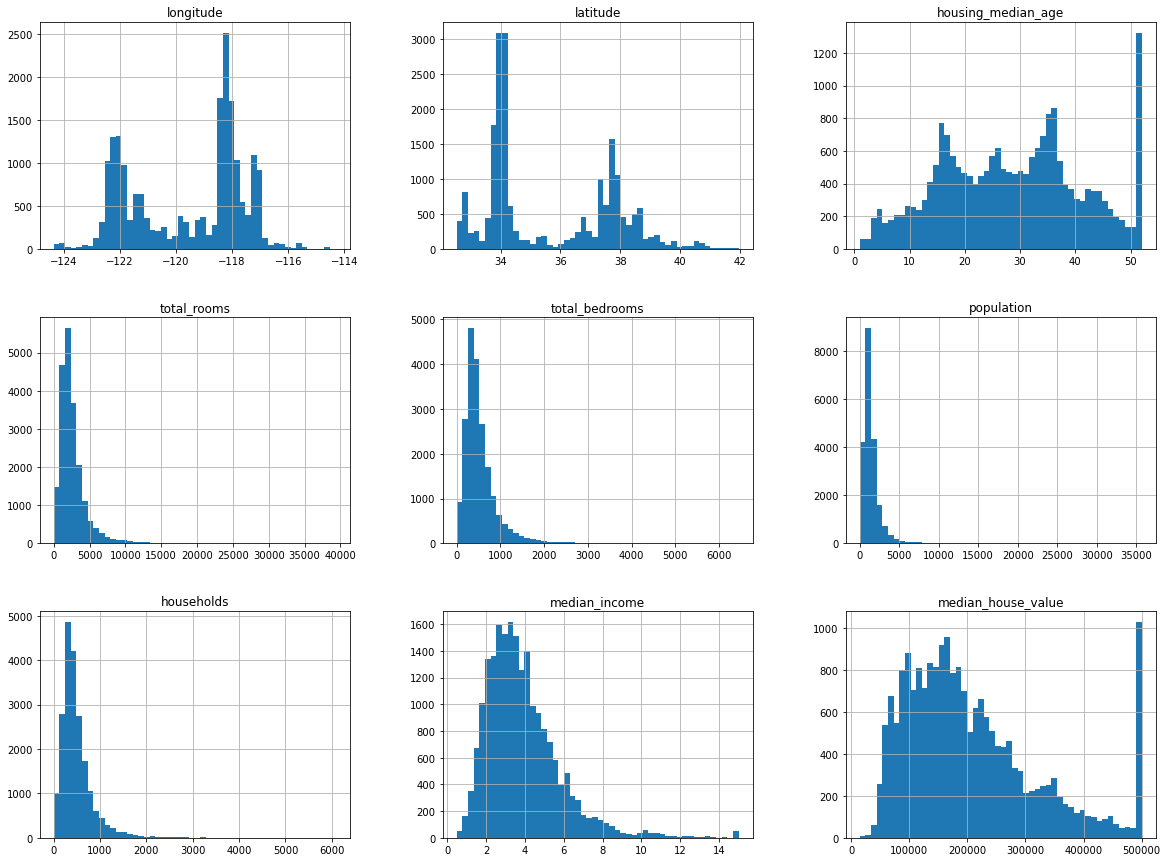

In [6]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
import numpy as np
from zlib import crc32

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2* 32 

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


Spliting a dataset into training and test sets can be also done using sklearn's function *train_test_split*

In [8]:
from sklearn.model_selection import train_test_split 

#train_set, test_set = train_test_split(housing, test_size=0.2, random_state= 42)

If the data set is large enough, it is generally satisfactory to split it into train and test sets randomly without introduction os significant biais. If the training set is not that large, we must use that the training set is enough representative of the target population. Sampling should also respect proportions. 

For example, if expert say that median income is important to predict house prices, we want to obtain training an test test with enough representation of median income distribution.  

<AxesSubplot:>

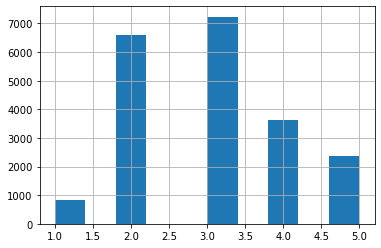

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [11]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Vizualization of data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

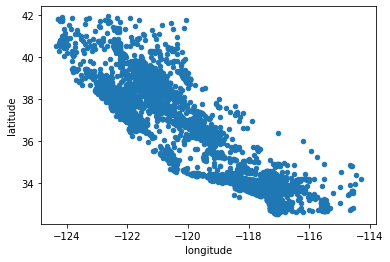

In [12]:
viz_housing = strat_train_set.copy()
viz_housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

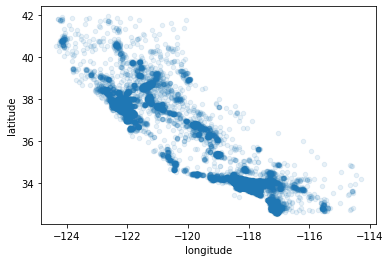

In [13]:
viz_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

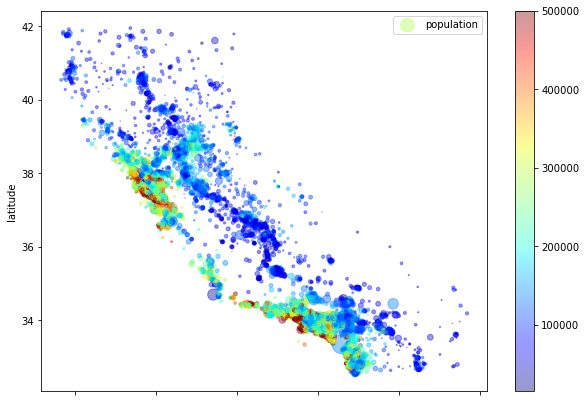

In [14]:
viz_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                 s=viz_housing["population"]/100, label="population", figsize=(10,7),
                 c=viz_housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True,
                )
plt.legend()

In [15]:
corr_matrix = viz_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

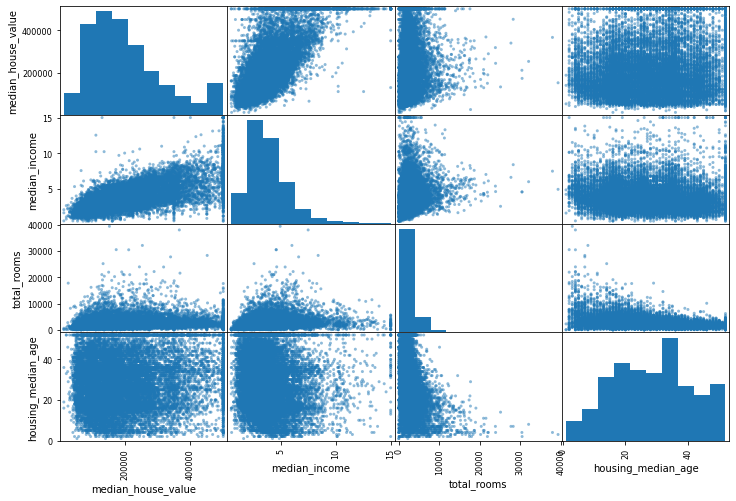

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(viz_housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

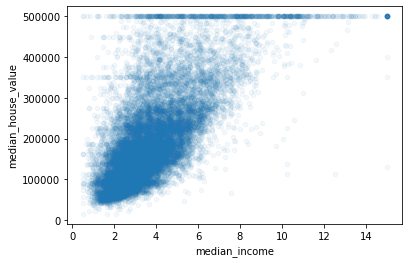

In [17]:
viz_housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.05)

You may notice the price cap at 500000$ and other straight less obvious straight lines: at 450000$ and maybe others arround 350000$ and 280000$. (you can reduce alpha in the scatter plot to see more clearly data, specially if the there is great concentration of data at certain regions)   

In [18]:
viz_housing["rooms_per_household"] = viz_housing["total_rooms"]/viz_housing["households"]
viz_housing["bedrooms_per_room"] = viz_housing["total_bedrooms"]/viz_housing["total_rooms"]
viz_housing["population_per_household"] = viz_housing["population"]/viz_housing["households"]
viz_housing["rooms_per_population"] = viz_housing["total_rooms"]/viz_housing["population"]
viz_housing["bedrooms_per_population"] = viz_housing["total_bedrooms"]/viz_housing["population"]

corr_matrix = viz_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_population        0.199429
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
bedrooms_per_population     0.065419
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Here rooms per population and rooms per household are more predictive than number of rooms

#### Data cleaning

Getting fresh copies from training dataset

In [19]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Attribute "Total bedrooms" has missing values. This must be fixed by: 
* Dropping tuples (information is lost)
* Not using "total bedrooms" at all (but maybe informative enough)
* Filling missing values by some value (mean, median, custum value)
  * It is important to store the used value to use it again for test set and in production. It is an attribute of the model to be produced. 

Let's use the mean. 

In [20]:
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)

### The scikitlearn way

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ="median")
#Get rid of non-numerical attributes

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num) # computes the median for all attributes of housing_num

X = imputer.transform(housing_num) #X is a Numpy array
#putting it in a pandas dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

#### Handling text and categorical data

In [21]:
housing_cat = housing[["ocean_proximity"]]
housing_cat["ocean_proximity"].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

Categorical data as there is limited number possible values.

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Problem: there is no notion of distance between categorical data here. 'Near Ocean' corresponding to 4 is not "closer" to 'Island' (2) than 'Inland" (1). 
This must not be used by ML algorithms and distances between categories as measure of distance between tuples. 

To fix this issue, a common solution is to use a binary attribute per category: adding attributes "Island", "Near Ocean" ... to the data set. Tuples having "Near Ocean" as category in the initial dataset will have 1 as value for attribute "Near Ocean" and 0 for others. It is called **One hot encoding**. 

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

#### Custom transformers

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [26]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prediction", lin_reg.predict(some_data_prepared))
print("Labels", list(some_labels))

housing_predictions_lin = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions_lin)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Prediction [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


68628.19819848923

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10) #cross validation expects an utility function = - cost function
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [69166.39765234 67127.99146091 71337.67978108 68780.9781725
 71951.51085052 74276.92509046 70186.94409085 72497.08412219
 76871.21412882 69269.26645629]
Mean:  71146.5991805951
Standard deviation:  2742.0839826192014


In [30]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.674001798346


In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-forest_scores)

display_scores(forest_rmse)

Scores:  [49452.44208408 47631.30466725 49980.52963656 52019.62421642
 49697.78562512 53137.81443221 49010.02718875 48222.58206042
 53159.0818078  50207.34725089]
Mean:  50251.853896949695
Standard deviation:  1829.0642103628563


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], "n_estimators": [3,10], "max_features":[2,3,4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64269.38435210196 {'max_features': 2, 'n_estimators': 3}
55314.69562217296 {'max_features': 2, 'n_estimators': 10}
53155.2815326486 {'max_features': 2, 'n_estimators': 30}
60433.67086712012 {'max_features': 4, 'n_estimators': 3}
52888.243105768284 {'max_features': 4, 'n_estimators': 10}
50573.80117848641 {'max_features': 4, 'n_estimators': 30}
59902.460294714496 {'max_features': 6, 'n_estimators': 3}
52226.25011343327 {'max_features': 6, 'n_estimators': 10}
49684.929484048356 {'max_features': 6, 'n_estimators': 30}
58959.55780212081 {'max_features': 8, 'n_estimators': 3}
52217.355280322765 {'max_features': 8, 'n_estimators': 10}
50192.273058934705 {'max_features': 8, 'n_estimators': 30}
62918.10226746107 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54229.33071994726 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60567.98414287502 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52697.92577175148 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [39]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3451224454536545, 'median_income'),
 (0.12544515466034328, 'INLAND'),
 (0.1044089538509599, 'pop_per_hhold'),
 (0.08688199668893505, 'longitude'),
 (0.0767153320063428, 'bedrooms_per_room'),
 (0.07329953406157487, 'latitude'),
 (0.04648467466501746, 'rooms_per_hhold'),
 (0.03858187777302115, 'housing_median_age'),
 (0.022899495952329665, '<1H OCEAN'),
 (0.017613669898025538, 'population'),
 (0.0171228027949386, 'total_rooms'),
 (0.016510365946380175, 'total_bedrooms'),
 (0.015409532850774914, 'households'),
 (0.008917542605542875, 'NEAR OCEAN'),
 (0.0045206558964366915, 'NEAR BAY'),
 (6.596489572244101e-05, 'ISLAND')]

In [42]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47341.19075446407

In [43]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - Y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale = stats.sem(squared_errors)))
 

array([45378.25368647, 49225.91569963])

In [45]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [10, 30, 40, 50, 100, 1000]},
    {'kernel': ['rbf'], 'C': [10, 30, 40, 50, 100, 1000], 'gamma' : [0.01, 0.02, 0.1, 0.5]}
]

svm_reg = SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ................................C=10, kernel=linear; total time=   6.6s
[CV] END ................................C=10, kernel=linear; total time=   6.6s
[CV] END ................................C=10, kernel=linear; total time=   6.5s
[CV] END ................................C=10, kernel=linear; total time=   6.5s
[CV] END ................................C=10, kernel=linear; total time=   8.7s
[CV] END ................................C=30, kernel=linear; total time=   9.2s
[CV] END ................................C=30, kernel=linear; total time=   6.8s
[CV] END ................................C=30, kernel=linear; total time=   6.6s
[CV] END ................................C=30, kernel=linear; total time=   7.0s
[CV] END ................................C=30, kernel=linear; total time=   6.8s
[CV] END ................................C=40, kernel=linear; total time=   6.3s
[CV] END ................................C=40, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10, 30, 40, 50, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [10, 30, 40, 50, 100, 1000],
                          'gamma': [0.01, 0.02, 0.1, 0.5], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [46]:
grid_search.best_score_
grid_search.best_params_

{'C': 1000, 'kernel': 'linear'}